# Geospatial Data Analytics Final Spring 2023


## General Instructions
You will upload a single jupyter notebook that completes all the following questions onto Brightspace. Do not upload this notebook to GitHub! I do not want you to be able to view each other's responses. The only item that will go on GitHub is the final interactive map produced in Section 3. You will have until midnight Wednesday April 5th to upload.

## Background
In 2022, California experienced the driest January, February and March in over 100 years ([source](https://drought.ca.gov/#:~:text=Tracking%20conditions&text=These%20include%20reservoirs%20and%20melted,March%20in%20over%20100%20years.)). Fast forward to 2023 and we have experienced what appears to be one of the wettest winters. The premise of this final exam is to prepare a comprehensive geospatial analysis which provides data analytics to support the extreme dry and wet conditions we have recently experienced locally in Los Angeles. 

## Part 1: Time series evaluations
You a provided a dataset for daily metereological data for Los Angeles county weather stations (``` data/noaa-daily-la-county-weather-data.csv ```) for March 30th 2018 until March 30th 2023. Complete the following tasks:

1. Load the dataset. How many unique stations are there?
2. Create a new dataframes of precipitation (```PRCP ```) data for a station located in Pasadena (where ```STATION``` is ```US1CALA0036```).
3. For this precipitation dataframe, how many days did daily precipitation exceed 1 inch in March 2023? How about for March 2022? 
4. Create a new column in the precipitation dataframe, and convert inches of precipitation to centimeters. 
5. Calculate the sum of precipitation for each month and year of data provided. Select only the March totals. Print this dataframe. Of the years provided - what year was the driest March? What year was the wettest March? 

## Part 2: Comparisons of vegetation health at Griffith Park
You are provided two Sentinel-2 datasets, one for March 2022 (``` data/2022-03-09/ ```) and another for March 2023 (``` data/2023-03-24/ ```). You will make a comparison of vegetation health differences between the two years in Griffith Park.

1. Load and calculate NDVI for both dates.
2. Crop both dates by the Griffith Park vector file provided (``` data/Griffith_Park.geojson```).
3. Map Griffith Park NDVI side by side for both years. Use an appropriate colorbar.
4. Using zonal statistics to compare the mean NDVI between the two years. 
5. Write a few sentences about your zonal stats results and the mapped comparisons from item (3). 
6. Use the following breaks to reclassify the NDVI data:
- <0: water 
- 0 to 0.2: urban/barren
- 0.2 to 0.5: low vegetation
- $\gt$ 0.5: high vegetation
7. Plot the two maps using the following parameters:
- ```colors = ['your-color-1', 'your-color-2', 'your-color-3', 'your-color-4']```
- ```class_bins = [0.5, 1.5, 2.5, 3.5, 4.5]```
8. Create a histogram of the classified NDVI data for both years. Give rough approximations of the percentages of each cateogry (i.e. ~20% water, ~40% barren/urban land etc.) for each year. 


## Part 3: Finding the nearest weather stations for parks in LA County for future analysis 
Let's say you are asked to update watering schedules to parks in LA county, depending on current rain conditions. We would need to figure out what is the closest weather station. Let's do this preliminary work to find this.

1. Load the meteorological data again (``` data/noaa-daily-la-county-weather-data.csv ```).
2. Calculate total total precipitation for the year 2022 for all weather stations. Drop any stations without precipitation data. How many weather stations remain?  
3. Find the nearest weather station to each Los Angeles County park (``` Recreation_and_Parks.geojson```). Capture the name (``` STATION ```) of the closest weather station. Note, this is not as straight forward as just copying and pasting from section-02 week 10! You actually have to think logically what columns are needed (centroids or geometries? what is the target dataframe?). Think carefully! 
4. You should have an updated parks dataframe which captures the ``` STATION ``` name of the nearest weather station. Join the total 2022 total precipitation amounts from part (2) to this dataframe.
5. Create an interactive map which plots the park locations and has a ``` Tooltip ``` capability of showing the ``` Name ``` of the park (using alias of ``` Park Name ```) and the name of the closest weather station using the alias of ``` Nearest Weather Station ``` as well as the total 2022 precipitation amount using the alias of ``` Total 2022 Rainfall (in) ```.
6. Save and publish this map to GitHub. Paste the link to view it.

## PART 1

In [552]:
import pandas as pd
import numpy as np

In [553]:
fp = "data/noaa-daily-la-county-weather-data.csv"
data = pd.read_csv(fp)
data.head()

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,PRCP
0,US1CALA0036,"PASADENA 2.0 SE, CA US",34.13916,-118.11611,225.2,3/30/18,0.0
1,US1CALA0036,"PASADENA 2.0 SE, CA US",34.13916,-118.11611,225.2,3/31/18,0.0
2,US1CALA0036,"PASADENA 2.0 SE, CA US",34.13916,-118.11611,225.2,4/1/18,0.0
3,US1CALA0036,"PASADENA 2.0 SE, CA US",34.13916,-118.11611,225.2,4/2/18,0.0
4,US1CALA0036,"PASADENA 2.0 SE, CA US",34.13916,-118.11611,225.2,4/3/18,0.0


## 1.1

In [554]:
print(
    "There were",
    data["STATION"].nunique(),
    "unique stations",
)

There were 96 unique stations


## 1.2

In [555]:
station = data.loc[0:1807, ["STATION", "PRCP", "DATE"]]

In [556]:
station.tail()

,STATION,PRCP,DATE
1803,US1CALA0036,0.00,3/26/23
1804,US1CALA0036,0.00,3/27/23
1805,US1CALA0036,0.00,3/28/23
1806,US1CALA0036,0.48,3/29/23
1807,US1CALA0036,0.45,3/30/23


## 1.3

In [557]:
station["DATE"][1778:1808].loc[station["PRCP"] > 1].count()

4

In March 2023 daily precipitation exceeded 1 inch 4 times.

In [558]:
station["DATE"][1413:1444].loc[station["PRCP"] > 1].count()

1

In March 2022 daily precipitation exceeded 1 inch 1 time.

## 1.4

In [559]:
prcp_in_cm = []
for i in range(len(station["PRCP"])):
    if station["PRCP"][i] != "****":
        prcp_in_cm.append((float(station["PRCP"][i]) * 2.54))

In [560]:
station["prcp_in_cm"] = prcp_in_cm

In [561]:
station.tail()

,STATION,PRCP,DATE,prcp_in_cm
1803,US1CALA0036,0.00,3/26/23,0.0000
1804,US1CALA0036,0.00,3/27/23,0.0000
1805,US1CALA0036,0.00,3/28/23,0.0000
1806,US1CALA0036,0.48,3/29/23,1.2192
1807,US1CALA0036,0.45,3/30/23,1.1430


## 1.5

Calculate the sum of precipitation for each month and year of data provided. Select only the March totals. Print this dataframe. Of the years provided - what year was the driest March? What year was the wettest March

In [562]:
import pandas as pd

# Read the data and parse dates
fp = "data/noaa-daily-la-county-weather-data.csv"
station1 = pd.read_csv(
    fp,
    usecols=["STATION", "DATE", "PRCP"],
    parse_dates=["DATE"],
)
# Rename the columns
new_cols = ["STATION_NUMBER", "DATE", "PRECIPITATION"]
station1.columns = new_cols
station1.head()

,STATION_NUMBER,DATE,PRECIPITATION
0,US1CALA0036,2018-03-30,0.0
1,US1CALA0036,2018-03-31,0.0
2,US1CALA0036,2018-04-01,0.0
3,US1CALA0036,2018-04-02,0.0
4,US1CALA0036,2018-04-03,0.0


In [563]:
station1["YEAR"] = station1["DATE"].dt.year
station1["MONTH"] = station1["DATE"].dt.month

In [564]:
station1

,STATION_NUMBER,DATE,PRECIPITATION,YEAR,MONTH
0,US1CALA0036,2018-03-30,0.00,2018,3
1,US1CALA0036,2018-03-31,0.00,2018,3
2,US1CALA0036,2018-04-01,0.00,2018,4
3,US1CALA0036,2018-04-02,0.00,2018,4
4,US1CALA0036,2018-04-03,0.00,2018,4
...,...,...,...,...,...
123748,USC00040144,2023-02-24,1.40,2023,2
123749,USC00040144,2023-02-25,2.00,2023,2
123750,USC00040144,2023-02-26,0.60,2023,2
123751,USC00040144,2023-02-27,0.00,2023,2


In [565]:
station1[["YEAR", "MONTH"]] = station1[["YEAR", "MONTH"]].astype(str)

In [566]:
grouped1 = station1.groupby(["YEAR", "MONTH"])

In [567]:
sums = list(grouped1.groups.keys())

In [568]:
grouped1.get_group(sums[0])["PRECIPITATION"]
grouped1.sort

True

In [569]:
grouped1.head()

,STATION_NUMBER,DATE,PRECIPITATION,YEAR,MONTH
0,US1CALA0036,2018-03-30,0.00,2018,3
1,US1CALA0036,2018-03-31,0.00,2018,3
2,US1CALA0036,2018-04-01,0.00,2018,4
3,US1CALA0036,2018-04-02,0.00,2018,4
4,US1CALA0036,2018-04-03,0.00,2018,4
...,...,...,...,...,...
1781,US1CALA0036,2023-03-04,0.00,2023,3
1782,US1CALA0036,2023-03-05,0.03,2023,3
2539,USW00003159,2018-03-30,0.00,2018,3
2540,USW00003159,2018-03-31,0.00,2018,3


In [570]:
sum_list = []
for i in range(len(sums)):
    sum_list.append(grouped1.get_group(sums[i])["PRECIPITATION"].sum())

In [571]:
zips = list(zip(sums, sum_list))
zips

[(('2018', '10'), 28.94),
 (('2018', '11'), 90.09),
 (('2018', '12'), 139.95),
 (('2018', '3'), 0.0),
 (('2018', '4'), 2.3),
 (('2018', '5'), 12.160000000000002),
 (('2018', '6'), 0.15),
 (('2018', '7'), 0.24),
 (('2018', '8'), 0.07),
 (('2018', '9'), 0.01),
 (('2019', '1'), 366.04),
 (('2019', '10'), 0.0),
 (('2019', '11'), 121.66),
 (('2019', '12'), 268.57),
 (('2019', '2'), 442.55),
 (('2019', '3'), 157.07),
 (('2019', '4'), 5.81),
 (('2019', '5'), 72.61000000000001),
 (('2019', '6'), 3.4800000000000004),
 (('2019', '7'), 0.36000000000000004),
 (('2019', '8'), 0.0),
 (('2019', '9'), 1.76),
 (('2020', '1'), 13.230000000000002),
 (('2020', '10'), 0.42000000000000004),
 (('2020', '11'), 8.62),
 (('2020', '12'), 79.92999999999999),
 (('2020', '2'), 10.899999999999999),
 (('2020', '3'), 268.53),
 (('2020', '4'), 215.47),
 (('2020', '5'), 11.59),
 (('2020', '6'), 1.25),
 (('2020', '7'), 0.0),
 (('2020', '8'), 0.17),
 (('2020', '9'), 0.0),
 (('2021', '1'), 116.26999999999998),
 (('2021', '

In [572]:
marches = []
for i in range(len(zips)):
    if zips[i][0][1] == '3':
        marches.append(zips[i])

In [573]:
marches

[(('2018', '3'), 0.0),
 (('2019', '3'), 157.07),
 (('2020', '3'), 268.53),
 (('2021', '3'), 70.9),
 (('2022', '3'), 84.03),
 (('2023', '3'), 292.63)]

In [574]:
[np.min([marches[i][1] for i in range(len(marches))]), np.max([marches[i][1] for i in range(len(marches))])]

[0.0, 292.63]

The dryest march was 2018 and the wettest march was 2023

## PART 2

In [575]:
from os import listdir
from os.path import isfile, join
import xarray as xr
import rioxarray as rxr
import rasterio
from rasterio.plot import show
from rasterstats import zonal_stats
import osmnx as ox
import geopandas as gpd
import os
import matplotlib.pyplot as plt
from shapely.geometry import mapping
%matplotlib inline

## 2.1

In [576]:
data_2022 = [f for f in listdir("data/2022-03-09/") if isfile(join("data/2022-03-09/", f))]
data_2022.sort()

In [577]:
data_2022

['2022-03-09-00:00_2022-03-09-23:59_Sentinel-2_L2A_B01_(Raw).tiff',
 '2022-03-09-00:00_2022-03-09-23:59_Sentinel-2_L2A_B02_(Raw).tiff',
 '2022-03-09-00:00_2022-03-09-23:59_Sentinel-2_L2A_B03_(Raw).tiff',
 '2022-03-09-00:00_2022-03-09-23:59_Sentinel-2_L2A_B04_(Raw).tiff',
 '2022-03-09-00:00_2022-03-09-23:59_Sentinel-2_L2A_B05_(Raw).tiff',
 '2022-03-09-00:00_2022-03-09-23:59_Sentinel-2_L2A_B06_(Raw).tiff',
 '2022-03-09-00:00_2022-03-09-23:59_Sentinel-2_L2A_B07_(Raw).tiff',
 '2022-03-09-00:00_2022-03-09-23:59_Sentinel-2_L2A_B08_(Raw).tiff',
 '2022-03-09-00:00_2022-03-09-23:59_Sentinel-2_L2A_B09_(Raw).tiff',
 '2022-03-09-00:00_2022-03-09-23:59_Sentinel-2_L2A_B11_(Raw).tiff',
 '2022-03-09-00:00_2022-03-09-23:59_Sentinel-2_L2A_B12_(Raw).tiff',
 '2022-03-09-00:00_2022-03-09-23:59_Sentinel-2_L2A_B8A_(Raw).tiff']

In [578]:
data_2022_paths = [os.path.join("data/2022-03-09/", data_2022[i]) for i in range(len(data_2022))]

In [579]:
march_2022 = [rxr.open_rasterio(data_2022_paths[i], masked=True).squeeze() for i in range(len(data_2022_paths))]

In [580]:
data_2023 = [f for f in listdir("data/2023-03-24/") if isfile(join("data/2023-03-24/", f))]
data_2023.sort()
data_2023_paths = [os.path.join("data/2023-03-24/", data_2023[i]) for i in range(len(data_2023))]
march_2023 = [rxr.open_rasterio(data_2023_paths[i], masked=True).squeeze() for i in range(len(data_2023_paths))]

In [581]:
ndvi_2022 = (march_2022[7] - march_2022[3])/(march_2022[7] + march_2022[3])

In [582]:
ndvi_2023 = (march_2023[7] - march_2023[3])/(march_2023[7] + march_2023[3])

## 2.2

In [583]:
aoi = os.path.join("data","Griffith_Park.geojson")
crop_extent = gpd.read_file(aoi)

In [584]:
print('crop extent crs: ', crop_extent.crs)
print('ndvi_2023 crs: ', ndvi_2023.rio.crs)
print('ndvi_2022 crs: ', ndvi_2022.rio.crs)

crop extent crs:  epsg:4326
ndvi_2023 crs:  EPSG:3857
ndvi_2022 crs:  EPSG:3857


In [585]:
crop_extent = crop_extent.to_crs(epsg=3857)

In [586]:
print('crop extent crs: ', crop_extent.crs)
print('ndvi_2023 crs: ', ndvi_2023.rio.crs)
print('ndvi_2022 crs: ', ndvi_2022.rio.crs)

crop extent crs:  epsg:3857
ndvi_2023 crs:  EPSG:3857
ndvi_2022 crs:  EPSG:3857


In [587]:
ndvi_2022_clipped = ndvi_2022.rio.clip(crop_extent.geometry.apply(mapping))

In [588]:
ndvi_2023_clipped = ndvi_2023.rio.clip(crop_extent.geometry.apply(mapping))

## 2.3

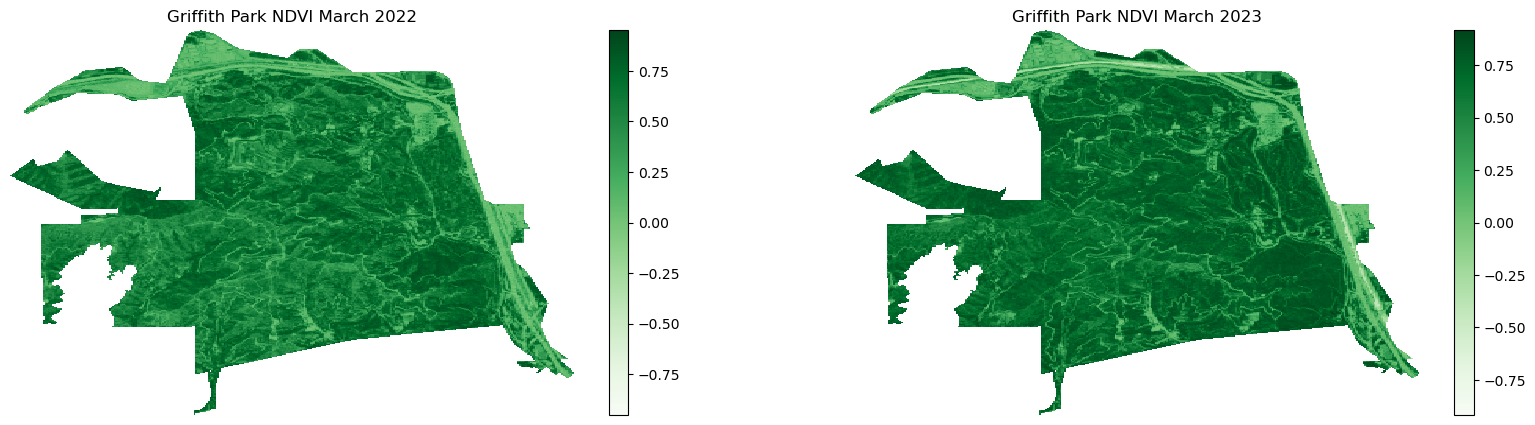

In [589]:
f, axs = plt.subplots(1,2, figsize=(20, 5))

ndvi_2022_clipped.plot.imshow(ax=axs[0],
                      cmap="Greens")
axs[0].set(title="Griffith Park NDVI March 2022")
axs[0].set_axis_off()

ndvi_2023_clipped.plot(ax=axs[1],
                      cmap="Greens")
axs[1].set(title="Griffith Park NDVI March 2023")
axs[1].set_axis_off()
plt.show()

## 2.4

In [590]:
my_path = os.path.join("data", "2022-NDVI.tiff")
my_path

'data/2022-NDVI.tiff'

In [591]:
# Export data to geotiff
ndvi_2022_clipped.rio.to_raster(my_path)

In [592]:
my_path = os.path.join("data", "2023-NDVI.tiff")
my_path
ndvi_2023_clipped.rio.to_raster(my_path)

In [593]:
import rasterio
from rasterio.plot import show
from rasterstats import zonal_stats
import osmnx as ox
import geopandas as gpd
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [594]:
ndvi_2022_fp = os.path.join("data", "2022-NDVI.tiff")
ndvi_2022_1 = rasterio.open(ndvi_2022_fp)

In [595]:
ndvi_2022_1

<open DatasetReader name='data/2022-NDVI.tiff' mode='r'>

In [596]:
array = ndvi_2022_1.read(1)
affine = ndvi_2022_1.transform

In [597]:
zonal_stats(crop_extent, array, affine=affine, stats=['min', 'max', 'mean', 'median', 'majority'])

/opt/tljh/user/lib/python3.9/site-packages/rasterstats/io.py:335: NodataWarning: Setting nodata to -999; specify nodata explicitly
  warnings.warn(


[{'min': -0.1428571492433548,
  'max': 0.9523809552192688,
  'mean': 0.552700182739628,
  'median': 0.6000000238418579,
  'majority': 0.6666666865348816}]

In [598]:
ndvi_2023_fp = os.path.join("data", "2023-NDVI.tiff")
ndvi_2023_1 = rasterio.open(ndvi_2023_fp)
array = ndvi_2023_1.read(1)
affine = ndvi_2023_1.transform
zonal_stats(crop_extent, array, affine=affine, stats=['min', 'max', 'mean', 'median', 'majority'])

[{'min': -0.47058823704719543,
  'max': 0.9178082346916199,
  'mean': 0.6160078818963022,
  'median': 0.7029703259468079,
  'majority': 0.7777777910232544}]

## 2.5

The zonal statistics show that 2022 had a higher maximum NDVI, but lower mean and minimum NDVI than 2023. Concurrently, this is evident on the maps as 2022 is overall lighter green than 2023 indicating a lower average NDVI. This means that 2022 saw less vegetation density/greenness in Griffith Park compared to 2023. This is most likely due to the high precipitation 2023 has been experiencing. 

## 2.6 & 2.7

In [599]:
class_bins = [-np.inf, 0, 0.2, 0.5, np.inf]
class_bins

[-inf, 0, 0.2, 0.5, inf]

In [600]:
ndvi_2022_class = xr.apply_ufunc(np.digitize,
                                     ndvi_2022_clipped,
                                     class_bins)
# Clean the data
valid_range = (0, 4.5)
# Only run this step if a valid range tuple is provided
if valid_range:
    mask = ((ndvi_2022_class < valid_range[0]) | (
        ndvi_2022_class > valid_range[1]))
    ndvi_2022_class = ndvi_2022_class.where(
        ~xr.where(mask, True, False))

NameError: name 'ax' is not defined

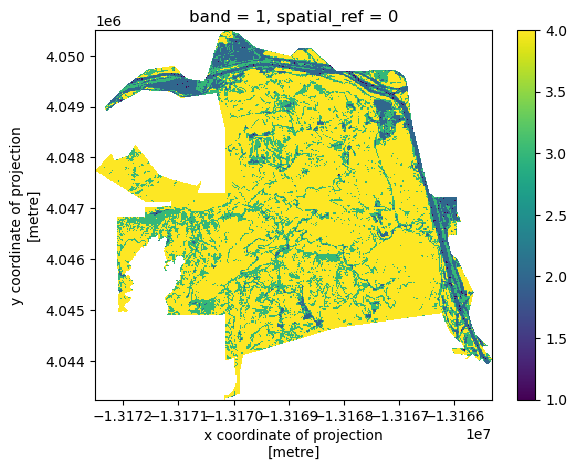

In [601]:
im = ndvi_2022_class.plot.imshow()
ax.set_axis_off()

In [602]:
ndvi_2023_class = xr.apply_ufunc(np.digitize,
                                     ndvi_2023_clipped,
                                     class_bins)
# Clean the data
valid_range = (0, 4.5)
# Only run this step if a valid range tuple is provided
if valid_range:
    mask = ((ndvi_2023_class < valid_range[0]) | (
        ndvi_2023_class > valid_range[1]))
    ndvi_2023_class = ndvi_2023_class.where(
        ~xr.where(mask, True, False))

NameError: name 'ax' is not defined

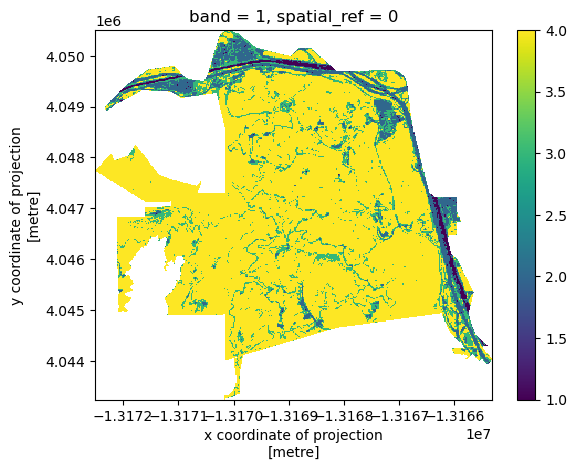

In [603]:
im = ndvi_2023_class.plot.imshow()
ax.set_axis_off()

## 2.8

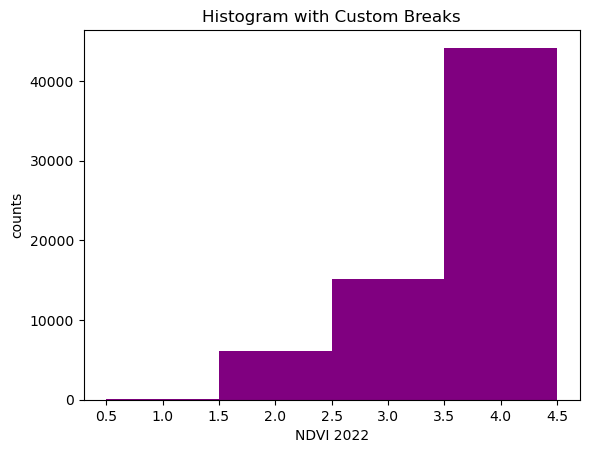

In [604]:
f, ax = plt.subplots()
ndvi_2022_class.plot.hist(color="purple",bins = [0.5, 1.5, 2.5, 3.5, 4.5])
ax.set(title="Histogram with Custom Breaks",
       xlabel="NDVI 2022",
       ylabel="counts")

plt.show()

In [605]:
np.histogram(ndvi_2022_class, bins=[0.5, 1.5, 2.5, 3.5, 4.5])

(array([  146,  6123, 15200, 44164]), array([0.5, 1.5, 2.5, 3.5, 4.5]))

In [606]:
counts_2022 = np.array([ 146,  6123, 15200, 44164])

In [607]:
counts_2022/(np.sum(counts_2022))

array([0.00222449, 0.09329148, 0.23159082, 0.67289321])

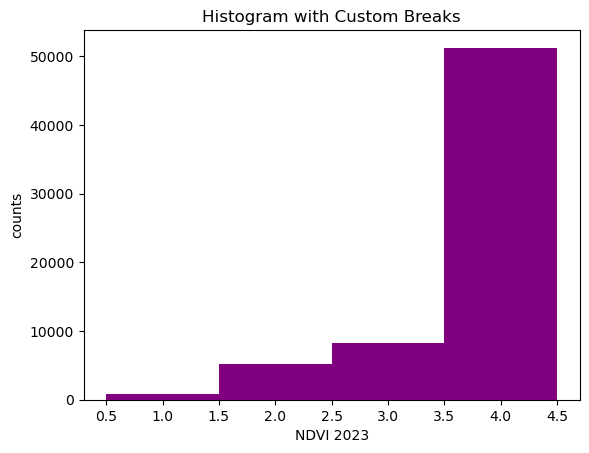

In [608]:
f, ax = plt.subplots()
ndvi_2023_class.plot.hist(color="purple",bins = [0.5, 1.5, 2.5, 3.5, 4.5])
ax.set(title="Histogram with Custom Breaks",
       xlabel="NDVI 2023",
       ylabel="counts")

plt.show()

In [609]:
np.histogram(ndvi_2023_class, bins=[0.5, 1.5, 2.5, 3.5, 4.5])

(array([  862,  5249,  8301, 51221]), array([0.5, 1.5, 2.5, 3.5, 4.5]))

In [610]:
counts_2023 = np.array([ 862,  5249,  8301, 51221])

In [611]:
counts_2023/(np.sum(counts_2022))

array([0.01313364, 0.07997501, 0.12647601, 0.78041534])

2022 only had about .2% water and about 67% vegetation while 2023 is 1.3% water and 78% vegetation. 

It's hard to know exactly what each bin means, but it is a guess that the remaining is urban land/barren land.

## PART 3

## 3.1

In [360]:
import rasterio
from rasterio.plot import show
from rasterstats import zonal_stats
import osmnx as ox
import geopandas as gpd
import os
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime

from dateutil.parser import parse
import pandas as pd

# Read the data and parse dates
fp = "data/noaa-daily-la-county-weather-data.csv"
weather = pd.read_csv(
    fp,
    usecols=["STATION", "DATE", "PRCP"],
    parse_dates=["DATE"],
)

new_cols = ["STATION_NUMBER", "YEAR", "PRECIPITATION"]
weather.columns = new_cols
weather.head()

,STATION_NUMBER,YEAR,PRECIPITATION
0,US1CALA0036,2018-03-30,0.0
1,US1CALA0036,2018-03-31,0.0
2,US1CALA0036,2018-04-01,0.0
3,US1CALA0036,2018-04-02,0.0
4,US1CALA0036,2018-04-03,0.0


In [193]:
weather["YEAR"] = weather["YEAR"].dt.year

In [194]:
weather

,STATION_NUMBER,YEAR,PRECIPITATION
0,US1CALA0036,2018,0.00
1,US1CALA0036,2018,0.00
2,US1CALA0036,2018,0.00
3,US1CALA0036,2018,0.00
4,US1CALA0036,2018,0.00
...,...,...,...
123748,USC00040144,2023,1.40
123749,USC00040144,2023,2.00
123750,USC00040144,2023,0.60
123751,USC00040144,2023,0.00


In [195]:
weather["YEAR"].nunique()

6

In [196]:
#REMOVE ZERO PRECIPITATION ROWS
weather_filtered = weather[weather["PRECIPITATION"] > 0]
 
weather_filtered.head()

,STATION_NUMBER,YEAR,PRECIPITATION
32,US1CALA0036,2018,0.01
33,US1CALA0036,2018,0.04
51,US1CALA0036,2018,0.13
52,US1CALA0036,2018,0.03
60,US1CALA0036,2018,0.07


## 3.2

In [197]:
grouped = weather_filtered.groupby("YEAR")

In [198]:
year = list(grouped.groups.keys())

In [199]:
grouped_weather = grouped.get_group(year[0])["PRECIPITATION"]

In [200]:
#grouped_weather_2022 = grouped_weather[["STATION_NUMBER", "PRECIPITATION"]].loc[(grouped_weather["YEAR"]=='2022')]

In [201]:
for i in range(len(year)):
    print("sum: " + str(grouped.get_group(year[4])["PRECIPITATION"].sum()))

sum: 412.52
sum: 412.52
sum: 412.52
sum: 412.52
sum: 412.52
sum: 412.52


In [202]:
weather_filtered["STATION_NUMBER"].nunique()

75

In [203]:
weather["STATION_NUMBER"].nunique()

96

21 stations have precipitation of zero, leaving 75 remaining.

## 3.3

In [204]:
base_path = os.path.join("data")
park_path = os.path.join(base_path, "Recreation_and_Parks.geojson")
park = gpd.read_file(park_path)
park.head()

,OBJECTID,Area_Acres,Park_ID,CD_Real,Address,Region,Name,Park_Class,CD_NEW,TOOLTIP,ACRES,geometry
0,1,8.433364,512,03,23751 Ingomar St,V,Lazy J Ranch Park,N,12,Name: Lazy J Ranch Park\nLocation: 23751 Ingom...,8.4333635,"POLYGON ((-118.64451 34.21238, -118.64451 34.2..."
1,2,1.387374,883,15,Adjacent to Angels Gate Park at 3400 Gaffey St...,P,Lookout Point Park,N,15,Name: Lookout Point Park\nLocation: Adjacent t...,1.38737377,"POLYGON ((-118.29192 33.71197, -118.29192 33.7..."
2,3,3.173861,320,15,1464 E 109th Street,P,109th Street Recreation Center,N,15,Name: 109th Street Recreation Center\nLocation...,3.17386107,"POLYGON ((-118.24925 33.93590, -118.24917 33.9..."
3,4,0.154871,366,08,4726 8th Avenue,P,Angeles Mesa Park,N,8,Name: Angeles Mesa Park\nLocation: 4726 8th Av...,0.1548711,"POLYGON ((-118.32523 34.00014, -118.32523 34.0..."
4,5,0.960725,213,09,4800 S. Hoover St,P,Julian C. Dixon Park,N,9,Name: Julian C. Dixon Park\nLocation: 4800 S. ...,0.96072542,"POLYGON ((-118.28680 33.99881, -118.28664 33.9..."


In [205]:
fp1 = "data/noaa-daily-la-county-weather-data.csv"
weather_1 = pd.read_csv(fp1)
weather_1.head()

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,PRCP
0,US1CALA0036,"PASADENA 2.0 SE, CA US",34.13916,-118.11611,225.2,3/30/18,0.0
1,US1CALA0036,"PASADENA 2.0 SE, CA US",34.13916,-118.11611,225.2,3/31/18,0.0
2,US1CALA0036,"PASADENA 2.0 SE, CA US",34.13916,-118.11611,225.2,4/1/18,0.0
3,US1CALA0036,"PASADENA 2.0 SE, CA US",34.13916,-118.11611,225.2,4/2/18,0.0
4,US1CALA0036,"PASADENA 2.0 SE, CA US",34.13916,-118.11611,225.2,4/3/18,0.0


In [206]:
from shapely.geometry import Point, MultiPoint
from shapely.ops import nearest_points
import numpy as np

In [207]:
weather_1['geometry'] = weather_1.apply(lambda row:Point(row['LATITUDE'],row['LONGITUDE']), axis=1)
weather_1.head()

/opt/tljh/user/lib/python3.9/site-packages/pandas/core/dtypes/cast.py:127: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,PRCP,geometry
0,US1CALA0036,"PASADENA 2.0 SE, CA US",34.13916,-118.11611,225.2,3/30/18,0.0,POINT (34.13916 -118.11611)
1,US1CALA0036,"PASADENA 2.0 SE, CA US",34.13916,-118.11611,225.2,3/31/18,0.0,POINT (34.13916 -118.11611)
2,US1CALA0036,"PASADENA 2.0 SE, CA US",34.13916,-118.11611,225.2,4/1/18,0.0,POINT (34.13916 -118.11611)
3,US1CALA0036,"PASADENA 2.0 SE, CA US",34.13916,-118.11611,225.2,4/2/18,0.0,POINT (34.13916 -118.11611)
4,US1CALA0036,"PASADENA 2.0 SE, CA US",34.13916,-118.11611,225.2,4/3/18,0.0,POINT (34.13916 -118.11611)


In [217]:
park_pts = MultiPoint([park['geometry'][i].centroid for i in range(len(park))])

In [218]:
park["centroid"] = park_pts

/opt/tljh/user/lib/python3.9/site-packages/pandas/core/common.py:560: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(data) != len(index):
/opt/tljh/user/lib/python3.9/site-packages/pandas/core/construction.py:618: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  data = list(data)
/opt/tljh/user/lib/python3.9/site-packages/pandas/core/construction.py:618: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  data = list(data)
/opt/tljh/user/lib/python3.9/site-packages/pandas/core/dtypes/cast.py:127: ShapelyD

In [413]:
weather_pts = MultiPoint([weather_1['geometry'][i] for i in range(len(weather_1))])

In [211]:
weather_1["centroid"] = weather_pts

/opt/tljh/user/lib/python3.9/site-packages/pandas/core/common.py:560: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(data) != len(index):
/opt/tljh/user/lib/python3.9/site-packages/pandas/core/construction.py:618: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  data = list(data)
/opt/tljh/user/lib/python3.9/site-packages/pandas/core/construction.py:618: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  data = list(data)
/opt/tljh/user/lib/python3.9/site-packages/pandas/core/dtypes/cast.py:127: ShapelyD

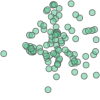

In [534]:
MultiPoint(weather_cut["geometry"])

In [538]:
def get_nearest_values(row, other_gdf, point_column='geometry', value_column="geometry"):
    """Find the nearest point and return the corresponding value from specified value column."""
    
    # Create an union of the other GeoDataFrame's geometries:
    other_points = MultiPoint(other_gdf["geometry"])
    # Find the nearest points
    nearest_geoms = nearest_points(row[point_column], other_points)
    
    # Get corresponding values from the other df
    nearest_data = other_gdf.loc[other_gdf["geometry"] == nearest_geoms[1]]
    
    nearest_value = nearest_data[value_column].values[0]
    
    return nearest_value

In [527]:
nearest_points(park.iloc[0]["centroid"], MultiPoint(weather_1["centroid"]))

(<shapely.geometry.point.Point at 0x7fac5d8e5ac0>,
 <shapely.geometry.point.Point at 0x7fac5d8e5c10>)

In [528]:
stations = np.unique(weather_1["STATION"])

In [442]:
weather_cut = gpd.GeoDataFrame([weather_1.loc[weather_1["STATION"] == stations[i]].iloc[0] for i in range(len(stations))])

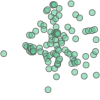

In [529]:
weather_cut["geometry"].unary_union

In [523]:
len(park["Park_ID"])

479

In [524]:
len(np.unique(park["Park_ID"]))

479

In [542]:
park["nearest station"] = park.apply(get_nearest_values,
                                                  other_gdf=weather_cut, point_column="geometry", value_column="STATION", axis=1)

In [543]:
park["nearest station"]

0      US1CALA0059
1      US1CALA0059
2      US1CALA0059
3      US1CALA0059
4      US1CALA0059
          ...     
474    US1CALA0059
475    US1CALA0059
476    US1CALA0059
477    US1CALA0059
478    US1CALA0059
Name: nearest station, Length: 479, dtype: object

In [539]:
nearest_station_names = [get_nearest_values(park.iloc[i], weather_cut, 'geometry', 'STATION') for i in range(len(park))]

In [540]:
nearest_station_names[0:-1:30]

['US1CALA0059',
 'US1CALA0059',
 'US1CALA0059',
 'US1CALA0059',
 'US1CALA0059',
 'US1CALA0059',
 'US1CALA0059',
 'US1CALA0059',
 'US1CALA0059',
 'US1CALA0059',
 'US1CALA0059',
 'US1CALA0059',
 'US1CALA0059',
 'US1CALA0059',
 'US1CALA0059',
 'US1CALA0059']

## I have tried doing it a few ways for a couple hours and keep getting the same station for every park which I know doesn't make sense, but I wanted to have a map anyways. Because this station also doesn't have 2022 data, I've added the precipitation data for the corresponding date instead.

In [460]:
import folium
from pyproj import crs
import geopandas as gpd
import matplotlib.pyplot as plt

In [482]:
weather_cut = weather_cut.reset_index()

In [483]:
indices = [weather_cut.loc[weather_cut['STATION'] == nearest_station_names[i]].index[0] for i in range(len(nearest_station_names))]

In [484]:
nps = weather_cut.iloc[indices]

In [547]:
park.iloc[0]["Name"]

'Lazy J Ranch Park'

In [548]:
# 34.0522° N, 118.2437° W
m = folium.Map(location=[34.0522, -118.2437], zoom_start=10, control_scale=True)

for i in range(len(nps)):
    folium.Marker(
        location=[park.iloc[i]['centroid'].y, park.iloc[i]['centroid'].x],
        popup="Park: "+park.iloc[i]["Name"]+" - Station: "+nps.iloc[0]["STATION"]+" - Precipitation: "+str(nps.iloc[0]["PRCP"]),
        icon=folium.Icon(color='green', icon='ok-sign'),
    ).add_to(m)

m

In [551]:
outfp = "weather_station_and_park_map.html"
m.save(outfp)

LINK TO MAP: https://sophiavigliano.github.io/Geospatial-Data-Analytics/weather_station_and_park_map.html